Agenda:
- 预处理
- 标记编码，one-hot编码
- 线性回归
- 岭回归
- 多项式回归
- 随机梯度下降回归
- Decision Tree
- AdaBoost Decision Tree - 预测房价
- Random Forest Regressor - 评估共享单车的需求分布

#### 数据预处理技术

In [0]:
import numpy as np
from sklearn import preprocessing
# import mlflow.sklearn
# mlflow.sklearn.autolog()

In [0]:
data = np.array([[ 3, -1.5,  2, -5.4],
                 [ 0,  4,  -0.3, 2.1],
                 [ 1,  3.3, -1.9, -4.3]])
data

Out[140]: array([[ 3. , -1.5,  2. , -5.4],
       [ 0. ,  4. , -0.3,  2.1],
       [ 1. ,  3.3, -1.9, -4.3]])

In [0]:
# 特征标准化(Z-score标准化，0-1标准化)，变为均值为0，标准差为1的标准正态分布形式。消除量纲，减少特征之间的偏差
data_standardized = preprocessing.scale(data)

print(data_standardized)
print("\nMean =", data_standardized.mean(axis=0))
print("Std deviation =", data_standardized.std(axis=0))

[[ 1.33630621 -1.40451644  1.29110641 -0.86687558]
 [-1.06904497  0.84543708 -0.14577008  1.40111286]
 [-0.26726124  0.55907936 -1.14533633 -0.53423728]]

Mean = [ 5.55111512e-17 -1.11022302e-16 -7.40148683e-17 -7.40148683e-17]
Std deviation = [1. 1. 1. 1.]


In [0]:
# 范围缩放(Scaling) - 将特征缩放到数据范围
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled = data_scaler.fit_transform(data)
print("\nMin max scaled data:\n", data_scaled)


Min max scaled data:
 [[1.         0.         1.         0.        ]
 [0.         1.         0.41025641 1.        ]
 [0.33333333 0.87272727 0.         0.14666667]]


In [0]:
# normalization - 归一化，如下按照特征向量L1范数来转换
data_normalized = preprocessing.normalize(data, norm='l1')
print("\nL1 normalized data:\n", data_normalized)


L1 normalized data:
 [[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]


In [0]:
# binarization - 二值化，将特征向量转化为布尔类型向量
data_binarized = preprocessing.Binarizer(threshold=1.4).transform(data)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]


In [0]:
# one hot encoding - 独特编码，是一种收紧特征向量的工具. 它把特征向量的每个特征与特征的非重复总数相对应，通过one-of-k的形式对每个值进行编码。
# 特征向量的每个值都按照这种方式编码，这样可以更佳有效的表示空间
encoder = preprocessing.OneHotEncoder()
encoder.fit([[0, 2, 1, 12], [1, 3, 5, 3], [2, 3, 2, 12], [1, 2, 4, 3]])
encoded_vector = encoder.transform([[2, 3, 5, 3]]).toarray()
print("\nEncoded vector:\n", encoded_vector)


Encoded vector:
 [[0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]


#### 标记编码技术

In [0]:
import numpy as np
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
input_classes = ['audi', 'ford', 'audi', 'toyota', 'ford', 'bmw']
label_encoder.fit(input_classes)

# print classes
print("\nClass mapping:")
for i, item in enumerate(label_encoder.classes_):
    print(item, '-->', i)

# transform a set of classes
labels = ['toyota', 'ford', 'audi']
encoded_labels = label_encoder.transform(labels)
print("\nLabels =", labels) 
print("Encoded labels =", list(encoded_labels))

# inverse transform
encoded_labels = [2, 1, 0, 3, 1]
decoded_labels = label_encoder.inverse_transform(encoded_labels)
print("\nEncoded labels =", encoded_labels)
print("Decoded labels =", list(decoded_labels))


Class mapping:
audi --> 0
bmw --> 1
ford --> 2
toyota --> 3

Labels = ['toyota', 'ford', 'audi']
Encoded labels = [3, 2, 0]

Encoded labels = [2, 1, 0, 3, 1]
Decoded labels = ['ford', 'bmw', 'audi', 'toyota', 'bmw']


#### OLS-Ordinary Least Square，普通最小二乘法构建线性回归器，目标最小化残差平方和(sum of squares of differences)

In [0]:
%python
# df = spark.read.text('/FileStore/tables/data_singlevar.txt', header="true", inferSchema="true")
df = spark.read.text('/FileStore/tables/data_singlevar.txt')

In [0]:
df1 = df.toPandas()
df1['x'], df1['y'] = df1['value'].str.split(',', 1).str
df1.head()

<command-1060668381130967>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df1['x'], df1['y'] = df1['value'].str.split(',', 1).str


,value,x,y
0,"4.94,4.37",4.94,4.37
1,"-1.58,1.7",-1.58,1.7
2,"-4.45,1.88",-4.45,1.88
3,"-6.06,0.56",-6.06,0.56
4,"-1.22,2.23",-1.22,2.23


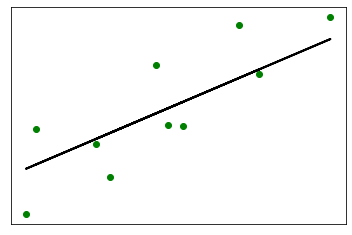

Mean absolute error = 0.54
Mean squared error = 0.38
Median absolute error = 0.54
Explain variance score = 0.68
R2 score = 0.68


In [0]:
X=df1['x'].astype('float')
y=df1['y'].astype('float')

# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1)) # 将数据转化为一维数组
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

# Create linear regression object
from sklearn import linear_model
linear_regressor = linear_model.LinearRegression()

# Train the model using the training sets
linear_regressor.fit(X_train, y_train)

# Predict the output
y_test_pred = linear_regressor.predict(X_test)

# Plot outputs
import matplotlib.pyplot as plt

plt.scatter(X[num_training:], y[num_training:], color='green')
plt.plot(X[num_training:], y_test_pred, color='black', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

# Measure performance - 通常做法是保证均方误差最低，解释方差最高。
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) # 平均绝对误差
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) # 均方误差
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) # 中位数绝对误差
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) # 解释方差分
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2)) # 确定性相关系数


# Model persistence - 模型保存为pkl格式，再次加载并使用
# import cPickle as pickle

# output_model_file = '3_model_linear_regr.pkl'

# with open(output_model_file, 'w') as f:
#     pickle.dump(linear_regressor, f)

# with open(output_model_file, 'r') as f:
#     model_linregr = pickle.load(f)

# y_test_pred_new = model_linregr.predict(X_test)
# print ("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))

#### 岭回归(Ridge Regression)
- 普通最小二乘法OLS的线性回归，对异常值敏感。引入正则化项系数作为阈值来消除异常值的影响，这种方法叫做岭回归

In [0]:
%python
spark.read.text('/FileStore/tables/data_multivar.txt').show()

+--------------------+
|               value|
+--------------------+
|0.39,2.78,7.11,-8.07|
| 1.65,6.7,2.42,12.24|
|5.67,6.38,3.79,23.96|
|  2.31,6.27,4.8,4.29|
|3.67,6.67,2.38,16.37|
|3.64,3.14,2.38,12.44|
| 7.0,3.85,8.39,13.45|
| 8.9,1.44,3.99,24.24|
|4.11,6.75,4.87,11.23|
|5.44,4.57,3.15,25.81|
|3.27,5.41,2.52,13.09|
| 2.68,2.14,5.75,0.63|
|   1.7,3.19,2.4,3.22|
| 1.25,5.44,2.54,3.32|
|1.06,4.38,4.78,-0.02|
|1.55,7.69,2.33,17.48|
|6.11,-0.74,4.08,2...|
| 3.47,4.41,5.34,5.34|
|4.99,2.43,0.79,21.84|
| 1.39,4.5,-0.3,11.88|
+--------------------+
only showing top 20 rows



In [0]:
df = spark.read.text('/FileStore/tables/data_multivar.txt')
df1 = df.toPandas()
df1['a'], df1['b'], df1['c'], df1['y'] = df1['value'].str.split(',', 3).str
df1.head()
df1 = df1.drop('value',axis=1)

<command-3707389951849727>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df1['a'], df1['b'], df1['c'], df1['y'] = df1['value'].str.split(',', 3).str


In [0]:
df1[['a','b','c','y']] = df1[['a','b','c','y']].astype('float')
df1.dtypes

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1:]


# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
#X_train = np.array(X[:num_training]).reshape((num_training,1))
X_train = np.array(X[:num_training])
y_train = np.array(y[:num_training])

# Test data
#X_test = np.array(X[num_training:]).reshape((num_test,1))
X_test = np.array(X[num_training:])
y_test = np.array(y[num_training:])

# Create linear regression object
from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()
ridge_regressor = linear_model.Ridge(alpha=50, fit_intercept=True, solver='auto', max_iter=None) 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


# Train the model using the training sets
linear_regressor.fit(X_train, y_train)
ridge_regressor.fit(X_train, y_train)

# Predict the output
y_test_pred = linear_regressor.predict(X_test)
y_test_pred_ridge = ridge_regressor.predict(X_test)

# Measure performance
import sklearn.metrics as sm

print("LINEAR-线性回归:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

print("\nRIDGE-岭回归:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred_ridge), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred_ridge), 2))
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred_ridge), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred_ridge), 2))

LINEAR-线性回归:
Mean absolute error = 3.95
Mean squared error = 23.15
Median absolute error = 3.69
Explained variance score = 0.84
R2 score = 0.83

RIDGE-岭回归:
Mean absolute error = 3.91
Mean squared error = 22.67
Median absolute error = 3.58
Explained variance score = 0.84
R2 score = 0.84


#### 多项式回归(Polynomial Regression)，随机梯度下降回归(SGD-Stochastic Gradient Descent Regressor)
- 克服了线性模型只能把数据拟合成直线的局限

In [0]:
# Polynomial regression - 多项式回归
from sklearn.preprocessing import PolynomialFeatures

# 训练多项式回归
polynomial = PolynomialFeatures(degree=3) # (通过更改多项式的degree，来比较和真实值的拟合程度)
X_train_transformed = polynomial.fit_transform(X_train) # 这里表示多项式形式的输入

# 用训练集第一个点来做模型验证
datapoint = X_train[0].reshape(1,3)
poly_datapoint = polynomial.fit_transform(datapoint)

# 多项式回归
poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)
print("\nPolynomial regression:\n", poly_linear_model.predict(poly_datapoint))

# 比较多项式回归和线性回归的结果差异。线性回归
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)
print("\nLinear regression:\n", linear_regressor.predict([X_train[0]]))

# 随机梯度下降回归 - SGD:Stochastic Gradient Descent regressor
sgd_regressor = linear_model.SGDRegressor(loss='huber', max_iter=100)
sgd_regressor.fit(X_train, y_train)
print("\nSGD regressor:\n", sgd_regressor.predict(datapoint))

# 真实值 
print("\nActual value(y):\n",y_train[0])


Polynomial regression:
 [[-10.94807821]]

Linear regression:
 [[-11.0587295]]

SGD regressor:
 [-10.29989232]

Actual value(y):
 [-8.07]
/databricks/python/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### 用AdaBoost算法决策树回归器预测房价
- 决策树是一个树状模型，每个节点作出一个决策，从而影响最终结果
- AdaBoost算法指的是 adaptive boosting 算法，是一种利用其他系统增强模型准确性的技术。将不同版本的算法结果进行组合，用加权组合的方式获得最终结果，被称为弱学习器。
- AdaBoost算法在每个阶段获取的信息都会反馈到模型中，这样学习器在后一阶段重点训练难以分类的样本。这种方式可以增强系统的准确性
- 先用AdaBoost算法对数据集进行回归拟合，在计算误差，根据误差评估结果，再用同样的数据集重新拟合。这个过程可看作回归器的调优过程

In [0]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [0]:
# Load housing data - sklearn预置数据集
housing_data = datasets.load_boston() 
housing_data

Out[155]: {'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.

对比Decition Tree和AdaBoost算法性能差异 (AdaBoost可以让误差更小，且解释方差更接近1)

**** Decision Tree performance ****
Mean squared error = 22.48
Explained variance score = 0.73

**** AdaBoost performance ****
Mean squared error = 7.54
Explained variance score = 0.91


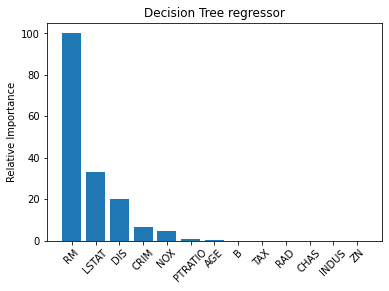

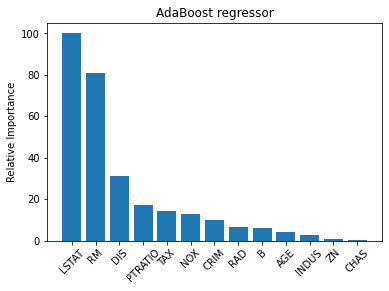

In [0]:
# Shuffle the data - 实际问题是基于数据独立同分布的假设条件来考虑的。即数据应该是随机出现的，而不是按照某种顺序排列好，这就是shuffle(洗牌)算法的目的。通过shuffle来提高模型的泛化能力。
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# Split the data 80/20 (80% for training, 20% for testing)
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

print('对比Decition Tree和AdaBoost算法性能差异 (AdaBoost可以让误差更小，且解释方差更接近1)')

# 训练普通决策树
# Fit decision tree regression model
dt_regressor = DecisionTreeRegressor(max_depth=4) # 限制最大深度，防止过拟合
dt_regressor.fit(X_train, y_train)

# Evaluate performance of Decision Tree regressor
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt) 
print("\n**** Decision Tree performance ****")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


# 训练AdaBoost决策树
# Fit decision tree regression model with AdaBoost
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7) # random_state用来标识随机数组，用于再次复现数据结果
ab_regressor.fit(X_train, y_train)

# Evaluate performance of AdaBoost
y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab) 
print("\n**** AdaBoost performance ****")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


# 自定义特征重要程度函数
def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values 
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the values and flip them
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Arrange the X ticks
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos,feature_names[index_sorted],rotation=45)
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

    
# 显示特征重要程度. 回归器对象regressor中的feature_importance会计算每个特征的相对重要性
plot_feature_importances(dt_regressor.feature_importances_, 'Decision Tree regressor', housing_data.feature_names)
plot_feature_importances(ab_regressor.feature_importances_, 'AdaBoost regressor', housing_data.feature_names)

#### 随机森林回归(Random Forest Regressor)
- 集成学习算法
- RF是一个决策树集合，它基本上是用一组由数据集若干子集构建的决策树构成，再用决策树平均值来改善整体学习效果

In [0]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor 
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [0]:
# 训练数据集来自：https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
df=spark.read.csv('/FileStore/tables/bike_day.csv', header="true", inferSchema="true")
df1 = df.toPandas()
df1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [0]:
# Select useful columns as features and target
# 数据集特征X的选取范围，前两列为标签和日期，最后两列的和为最后的y值，均为无效特征，故移除前两列和第13,14列
X = np.array(df1.iloc[:,2:13])
y = np.array(df1.iloc[:,15:]).ravel()

# Extract feature names

feature_names = np.array(list(df1.iloc[:,2:13].columns)).ravel()

X,y = shuffle(X,y,random_state=7)

# Split the data 80/20 (80% for training, 20% for testing)
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# Fit Random Forest regression model
# n_estimators - 评估器的数量，表示随机森林需要使用的决策树数量
# max_depth - 每个决策树的最大深度
# min_sample_split - 决策树分裂一个节点需要用到的最小数据样本量
rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
rf_regressor.fit(X_train, y_train)

# Evaluate performance of Random Forest regressor
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred) 
print("\n**** Random Forest regressor performance ****")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


**** Random Forest regressor performance ****
Mean squared error = 302172.11
Explained variance score = 0.92


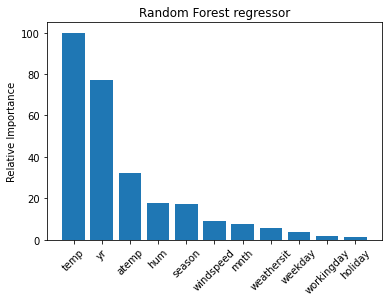

In [0]:
# 特征重要性可视化自定义函数
def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values 
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the values and flip them
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Arrange the X ticks
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    
#     print(feature_names)
#     print(index_sorted)
#     print(feature_names[index_sorted])
    plt.xticks(pos,feature_names[index_sorted],rotation=45)
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()
    
    
# Plot relative feature importances 
plot_feature_importances(rf_regressor.feature_importances_, 'Random Forest regressor', feature_names)

In [0]:
# 用颗粒度更精细的数据集bike_hour来尝试RF算法
df=spark.read.csv('/FileStore/tables/bike_hour.csv', header="true", inferSchema="true")
df1 = df.toPandas()
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [0]:
# Select useful columns as features and target
X = np.array(df1.iloc[:,2:14])
y = np.array(df1.iloc[:,16:]).ravel()

# Extract feature names

feature_names = np.array(list(df1.iloc[:,2:14].columns)).ravel()

X,y = shuffle(X,y,random_state=8)

# Split the data 80/20 (80% for training, 20% for testing)
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# Fit Random Forest regression model
rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
rf_regressor.fit(X_train, y_train)

# Evaluate performance of Random Forest regressor
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred) 
print("\n**** Random Forest regressor performance ****")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


**** Random Forest regressor performance ****
Mean squared error = 2667.92
Explained variance score = 0.92


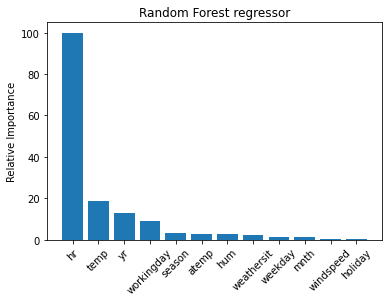

Conslusion: 使用bike_hour数据集后，最重要特征变为一天中的不同时刻点hr，这也符合事物的直觉；其次重要的是温度，这与之前的分析结果保持一致。


In [0]:
# 特征重要性可视化自定义函数
def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values 
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the values and flip them
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Arrange the X ticks
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    
#     print(feature_names)
#     print(index_sorted)
#     print(feature_names[index_sorted])
    plt.xticks(pos,feature_names[index_sorted],rotation=45)
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()
    
    
# Plot relative feature importances 
plot_feature_importances(rf_regressor.feature_importances_, 'Random Forest regressor', feature_names)

print('Conslusion: 使用bike_hour数据集后，最重要特征变为一天中的不同时刻点hr，这也符合事物的直觉；其次重要的是温度，这与之前的分析结果保持一致。')